# Random Forest Model

## Load the dataset

In [9]:
# Import the pandas, numpy packages and dump from joblib
import pandas as pd
import numpy as np
from joblib import dump

In [10]:
# Load the saved sets from data/processed using numpy
X_train = np.load('../data/processed/X_train.npy')
X_val   = np.load('../data/processed/X_val.npy'  )
y_train = np.load('../data/processed/y_train.npy')
y_val   = np.load('../data/processed/y_val.npy'  )

## Train Random Forest Model

In [11]:
# Import the RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Instantiate the RandomForestClassifier class called rf with a random state=8
rf = RandomForestClassifier(random_state=8)

In [13]:
# Fit the RandomForest model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

In [14]:
# Display the default parameter
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}

In [15]:
from joblib import dump 

dump(rf,  '../models/rf_original_default.joblib')

['../models/rf_original_default.joblib']

In [16]:
# Calculate the probability when target=1
probs_train=rf.predict_proba(X_train)[:,1]
probs_val=rf.predict_proba(X_val)[:,1]

In [17]:
# Import the function print_class_perf from models.performance and display the ROC-AUC score
import sys
sys.path.insert(1, '..')
from src.models.performance import print_class_perf

print_class_perf(y_actuals=y_train, y_probs=probs_train,set_name='Training')
print_class_perf(y_actuals=y_val, y_probs=probs_val,set_name='Validation')

ROC AUC Score Training: 1.0
ROC AUC Score Validation: 0.6744989768897448


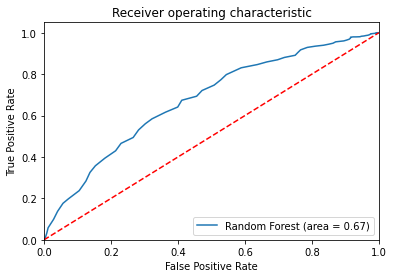

In [18]:
# Import roc_curve, matplotlib.pyplot and roc_auc_score and display the roc-auc plot
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

rf_roc_auc = roc_auc_score(y_val,probs_val)
fpr, tpr, thresholds = roc_curve(y_val, probs_val)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## Hyperparameter Tuning with Random Search

In [19]:
# Import randint from scipy.stats
from scipy.stats import randint

In [20]:
# Define the hyperparameters value randomly
hyperparams_dist = {
'n_estimators': randint(50,100),
'max_depth': randint(2,10),
'min_samples_leaf': randint(10,50)
}

In [21]:
# Import RandomizedSearchCV and KFold from sklearn.model_selection
from sklearn.model_selection import RandomizedSearchCV, KFold

In [22]:
# Instantiate a KFold with 5 splits
kf_cv = KFold(n_splits=5)

In [23]:
# Instantiate a RandomizedSearchCV with the hyperparameter values and the random forest model
random_search_rf = RandomizedSearchCV(rf, hyperparams_dist, random_state=8, cv=kf_cv, verbose=1)

In [24]:
# Fit the RandomizedSearchCV on the training set
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=8),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DC1DD10C40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DC1DCCEF70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DC1D108C40>},
                   random_state=8, verbose=1)

In [28]:
# Import dump from joblib and save the random forest model
from joblib import dump 

dump(random_search_rf,  '../models/rf_0.71021.joblib')

['../models/rf_0.71021.joblib']

In [25]:
# Display the best set of hyperparameters
random_search_rf.best_params_

{'max_depth': 5, 'min_samples_leaf': 14, 'n_estimators': 57}

In [26]:
# Calculate the probabilities for train and validation datasets
probs_train=random_search_rf.predict_proba(X_train)[:,1]
probs_val=random_search_rf.predict_proba(X_val)[:,1]

In [27]:
# Import the function print_class_perf from models.performance and display the ROC-AUC score
from src.models.performance import print_class_perf

print_class_perf(y_actuals=y_train, y_probs=probs_train,set_name='Training')
print_class_perf(y_actuals=y_val, y_probs=probs_val,set_name='Validation')

ROC AUC Score Training: 0.7440431476626649
ROC AUC Score Validation: 0.710210038517092


### Another trial with kfolder(n_splits=10) and n_estimators changed to 50-200

In [45]:
# Define the hyperparameters value randomly
hyperparams_dist = {
'n_estimators': randint(50,200),
'max_depth': randint(2,10),
'min_samples_leaf': randint(10,50)
}

In [46]:
# Instantiate a KFold with 5 splits
kf_cv_10 = KFold(n_splits=10)

In [47]:
# Instantiate a RandomizedSearchCV with the hyperparameter values and the random forest model
random_search_rf_10 = RandomizedSearchCV(rf, hyperparams_dist, random_state=8, cv=kf_cv_10, verbose=1)

In [48]:
# Fit the RandomizedSearchCV on the training set
random_search_rf_10.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=8),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D26B9E3970>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D26BA2F820>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D26BA2F1C0>},
                   random_state=8, verbose=1)

In [53]:
# Import dump from joblib and save the random forest model
from joblib import dump 

dump(random_search_rf_10,  '../models/rf_0.7121.joblib')

['../models/rf_0.7121.joblib']

In [49]:
# Display the best set of hyperparameters
random_search_rf_10.best_params_

{'max_depth': 7, 'min_samples_leaf': 36, 'n_estimators': 186}

In [50]:
# Calculate the probabilities for train and validation datasets
probs_train=random_search_rf_10.predict_proba(X_train)[:,1]
probs_val=random_search_rf_10.predict_proba(X_val)[:,1]

In [51]:
# Import the function print_class_perf from models.performance and display the ROC-AUC score
from src.models.performance import print_class_perf

print_class_perf(y_actuals=y_train, y_probs=probs_train,set_name='Training')
print_class_perf(y_actuals=y_val, y_probs=probs_val,set_name='Validation')

ROC AUC Score Training: 0.7769971081720967
ROC AUC Score Validation: 0.7121479297063071


## Load and clean the test dataset

In [136]:
# Load the pandas and numpy packages
import pandas as pd
import numpy as np

In [137]:
# Import csv file of test data and save into data_test
data_test=pd.read_csv('../data/raw/2022_test.csv')

In [138]:
# Create a copy of data_test and save it into a variable data_test_cleaned
data_test_cleaned=data_test.copy()

In [139]:
# Remove the columns of id, 3P Made, 3PA, 3P% and BLK
data_test_cleaned.drop(['Id','3P Made','3PA','3P%','BLK'],axis=1,inplace=True)

In [140]:
# Add the columns 'TOTAL_MIN','TOTAL_PTS' and 'FG/FT'
data_test_cleaned['TOTAL_MIN']=data_test_cleaned['MIN'] * data_test_cleaned['GP']
data_test_cleaned['TOTAL_PTS']=data_test_cleaned['PTS'] * data_test_cleaned['GP']
data_test_cleaned['FG/FT']=data_test_cleaned['FG%']/data_test_cleaned['FT%']


In [141]:
#  Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [142]:
# Instantiate the StandardScaler
scaler=StandardScaler()

In [143]:
# Fit and apply the scaling on data_test_cleaned
data_test_cleaned=scaler.fit_transform(data_test_cleaned)

In [144]:
# Create the variable X_test
X_test=data_test_cleaned

## Predict probabilities of target for test data

In [145]:
# Calculate the probabilities for test datasets
probs_test=random_search_rf.predict_proba(X_test)[:,1]

In [146]:
# Join the probs_test column into data_test
data_test['TARGET_5Yrs']=probs_test

In [147]:
# Export the csv file 'rf_submission_091122.csv' for Kaggle submission
output=data_test[['Id','TARGET_5Yrs']]
output.to_csv('../rf_submission_181122.csv',index=False)